<h1>Big 5 Project</h1>

Previous studies have shown that differences between sexes vary across cultures (Costa, Terracciano & McCrae,2001; Bleidorn, Arslan, Denissen, Rentfrow, Gebauer, Potter & Gosling, 2016). The focus of this project is to determine what properties of a country are influential in
the connection between the big 5 personality traits and sex. Specifically, I will search for
the influence of gender bias and gender inequality within each country on the prediction of sex according to the big 5 answers. Gender inequality or gender bias is found to be correlated to sex differences (Garawi, Devries, Thorogood & Uauy, 2014; de Looze, Elgar, Currie, Kolip & Stevens, 2019) and I therefore hypothesize that it will positivly influence accuracy and AUC scores when trying to predict the sex according to the big 5 scores. 

<h3>Pre-processing and EDA</h3>

The data used for this project can be found in this git repository and the links for the original data can be found under README.

Gender inequality: will be added based on the Gender Inequality Index (GII) that was
introduced in a human development report. Each country is scored and ranked by
different parameters depicting gender inequality in the country.
Gender bias: The Gender Social Norms Index (GSNI) tries to score each country&#39;s
gender bias regarding different topics. The GSNI measure contains data from 75
countries. Participants in this questionnaire (between the years of 2005-2014) had
to rank their opinions in several questions depicting gender bias. The percent added
will be the percent of bias within the male community.



In [74]:
import pandas as pd
import numpy as np

#loading the data
df_all_data = pd.read_excel("big_5_data.xlsx")
df_bias = pd.read_excel("gender_bias.xlsx")
df_inequality = pd.read_excel("gender_inequality.xlsx")


In this stage I will match countries' names in all data frames. For example, in the big_5_data.xlsx colombia is written with a "u" (columbia), and in the other two dataframes it's written with a o (colombia). Notice that some countries couldnt be be determined by name (e.g., "republic o" could be many countries/ regions).

In [75]:

list_all_data = set(df_all_data["country"]) 
list_bias = list(df_bias["country"])
list_inequality = list(df_inequality["country"])


combined_gender_lists = list_bias+list_inequality
set_list_gender = (set(combined_gender_lists))

list_first = list(set_list_gender.difference(list_all_data))
list_second = list(list_all_data.difference(set_list_gender))
combined_differences = list_first+list_second
sorted_comb = sorted(combined_differences,key=str.lower)

#using sorted_comb can show us which countries have different spelling in different lists

sorted_comb[0:5]#I show only first 5 examaples. In the preprocessing I rechecked and repeated this step to make sure no mistakes were made and no countries were neglected.


['Afghanista', 'Afghanistan', 'Anguilla', 'Antarctica', 'Antigua']

In [76]:
#replacing the names of the countries to match across all DataFrames
df_all_data = df_all_data.replace(" ","_",regex=True)

df_all_data = df_all_data.replace({"Afghanista": "Afghanistan", "Brunei": "Brunei Darussalam", "Burma(Myan": "Burma", "Columbia": "Colombia", "Dominican": "Dominican Republic", "Netherland": "Netherlands",
                   "Macedonia": "North Macedonia", "Philippine": "Philippines", "Switzerlan": "Switzerland", "Syria": "Syrian Arab Republic", "UK": "United Kingdom", "USA": "United States"})

df_all_data = df_all_data.replace({"South_Afri": "South Africa","Bosnia_Her": "Bosnia and Herzegovina", "Burkina_Fa": "Burkina Faso", "Cape_Verde": "Cabo Verde", "Central_Af": "Central African Republic", "Czech_Repu": "Czechia", "El_Salvado": "El Salvador", "Libyan_Ara": "Libya", "New_Zealan": "New Zealand",
                  "Papua_New": "Papua New Guinea", "Russian_Fe": "Russian Federation", "Saudi_Arab":"Saudi Arabia", "South_Kore": "south Korea", "Trinidad_a": "Trinidad and Tobago", "United_Ara": "United Arab Emirates","Vatican_Ci": "Vatican"},regex=True)  

df_all_data=df_all_data.replace("_"," ",regex=True)

#merge DataFrames
df_merged_1=pd.merge(df_all_data,df_bias)
data=pd.merge(df_inequality,df_merged_1)

#data=df_merged_2.loc[:, ~df_merged_2.columns.str.contains('^Unnamed')]

data['sex']=data.loc[:,'sex'].replace(2,False)
data['sex']=data.loc[:,'sex'].replace(1,True)

#True=male, False=female

data


country  gender_inequality_score  case_id  age    sex  \
0        Algeria                    0.429     1637   20  False   
1        Algeria                    0.429     2076   22   True   
2        Algeria                    0.429     2835   47  False   
3        Algeria                    0.429     4068   55  False   
4        Algeria                    0.429     4154   33  False   
...          ...                      ...      ...  ...    ...   
166243  Zimbabwe                    0.527   163918   34   True   
166244  Zimbabwe                    0.527   165076   16   True   
166245  Zimbabwe                    0.527   171247   42  False   
166246  Zimbabwe                    0.527   171776   19   True   
166247  Zimbabwe                    0.527   187795   29   True   

        agreeable_score  extraversion_score  openness_score  \
0              0.796667            0.623333        0.650000   
1              0.780000            0.536667        0.660000   
2              0.750000            0.500000        0.873333   
3              0.866667            0.766667        0.843333   
4              0.830000            0.656667        0.743333   
...                 ...                 ...             ...   
166243         0.696667            0.856667        0.743333   
166244         0.613333            0.660000        0.643333   
166245         0.820000            0.720000        0.770000   
166246         0.793333            0.696667        0.866667   
166247         0.593333            0.580000        0.700000   

        conscientiousness_score  neuroticism_score     Period  \
0                      0.863333           0.720000  2010–2014   
1                      0.606667           0.530000  2010–2014   
2                      0.636667           0.663333  2010–2014   
3                      0.856667           0.393333  2010–2014   
4                      0.906667           0.536667  2010–2014   
...                         ...                ...        ...   
166243                 0.820000           0.486667  2010–2014   
166244                 0.586667           0.583333  2010–2014   
166245                 0.860000           0.483333  2010–2014   
166246                 0.786667           0.490000  2010–2014   
166247                 0.773333           0.603333  2010–2014   

        gender_bias_score  
0                   98.68  
1                   98.68  
2                   98.68  
3                   98.68  
4                   98.68  
...                   ...  
166243              99.48  
166244              99.48  
166245              99.48  
166246              99.48  
166247              99.48  

[166248 rows x 12 columns]

Note that by replacing countries with information on the gender inequality and gender bias I handle the high cardinality of countries. That is, I replace the categorical data with continuous measures. Moreover, enriching the data with information regarding the country can hopefully help us understand more about the connection between the big 5, sex and countries.

In [77]:
PRED_COLUMN_NAMES=['age','agreeable_score','extraversion_score','openness_score','conscientiousness_score','neuroticism_score','gender_bias_score','gender_inequality_score']
TARGET_COLUMN_NAME=['sex']
big_5=['agreeable_score','extraversion_score','openness_score','conscientiousness_score','neuroticism_score']

data.info()

#only one row of data is missing (i.e., nan values), therefore I decided to dropna
data=data.dropna()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 166248 entries, 0 to 166247
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  166248 non-null  object 
 1   gender_inequality_score  166248 non-null  float64
 2   case_id                  166248 non-null  int64  
 3   age                      166248 non-null  int64  
 4   sex                      166248 non-null  bool   
 5   agreeable_score          166248 non-null  float64
 6   extraversion_score       166247 non-null  float64
 7   openness_score           166247 non-null  float64
 8   conscientiousness_score  166247 non-null  float64
 9   neuroticism_score        166247 non-null  float64
 10  Period                   166248 non-null  object 
 11  gender_bias_score        166248 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 15.4+ MB


<AxesSubplot:>

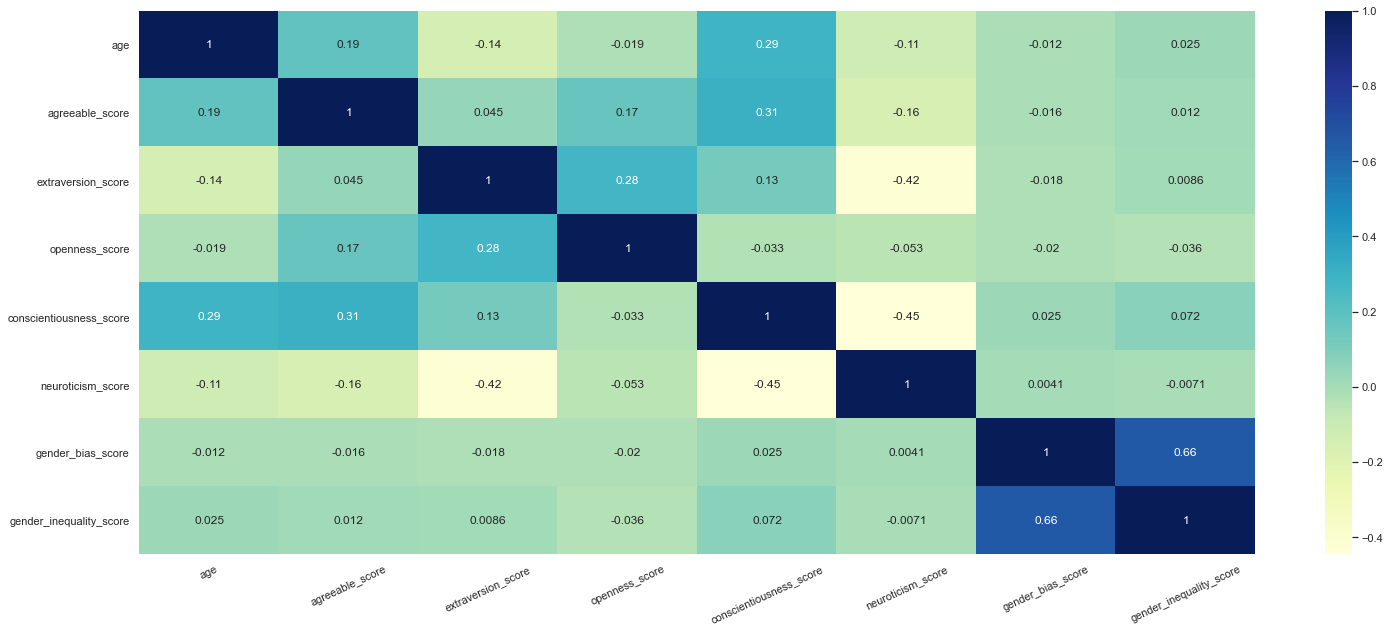

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

X = data.loc[:,PRED_COLUMN_NAMES] #predictive features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X.loc[:, PRED_COLUMN_NAMES] = scaler.fit_transform(
    X.loc[:, PRED_COLUMN_NAMES])


y = data[TARGET_COLUMN_NAME].copy() #target feature

#create a simple correlation matrix 
sns.set(font_scale=1)
correlation_matrix = X.corr()

fig, ax = plt.subplots(figsize=(25, 10))
heat_map = sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu")
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=25)
heat_map

Scaling was used to match the different scales used for scoring gender bias and gender inequality. As I only have 8 predictive features and intend to look for the relationship between the features, no dimensionality reduction was used.

As perhaps expected, gender inequality and gender bias are highly correlated. Moreover, neuroticism is negatively correlated with extraversions (neurotic people tend to be more introvert), and with conscientiousness. Openess is psotively correlated with openess, and conscientiousness is positively correlated with agreeable score and age (perhaps we become more conscientious as we mature).

Text(0.5, 1, 'Numerical Feature Distributions')

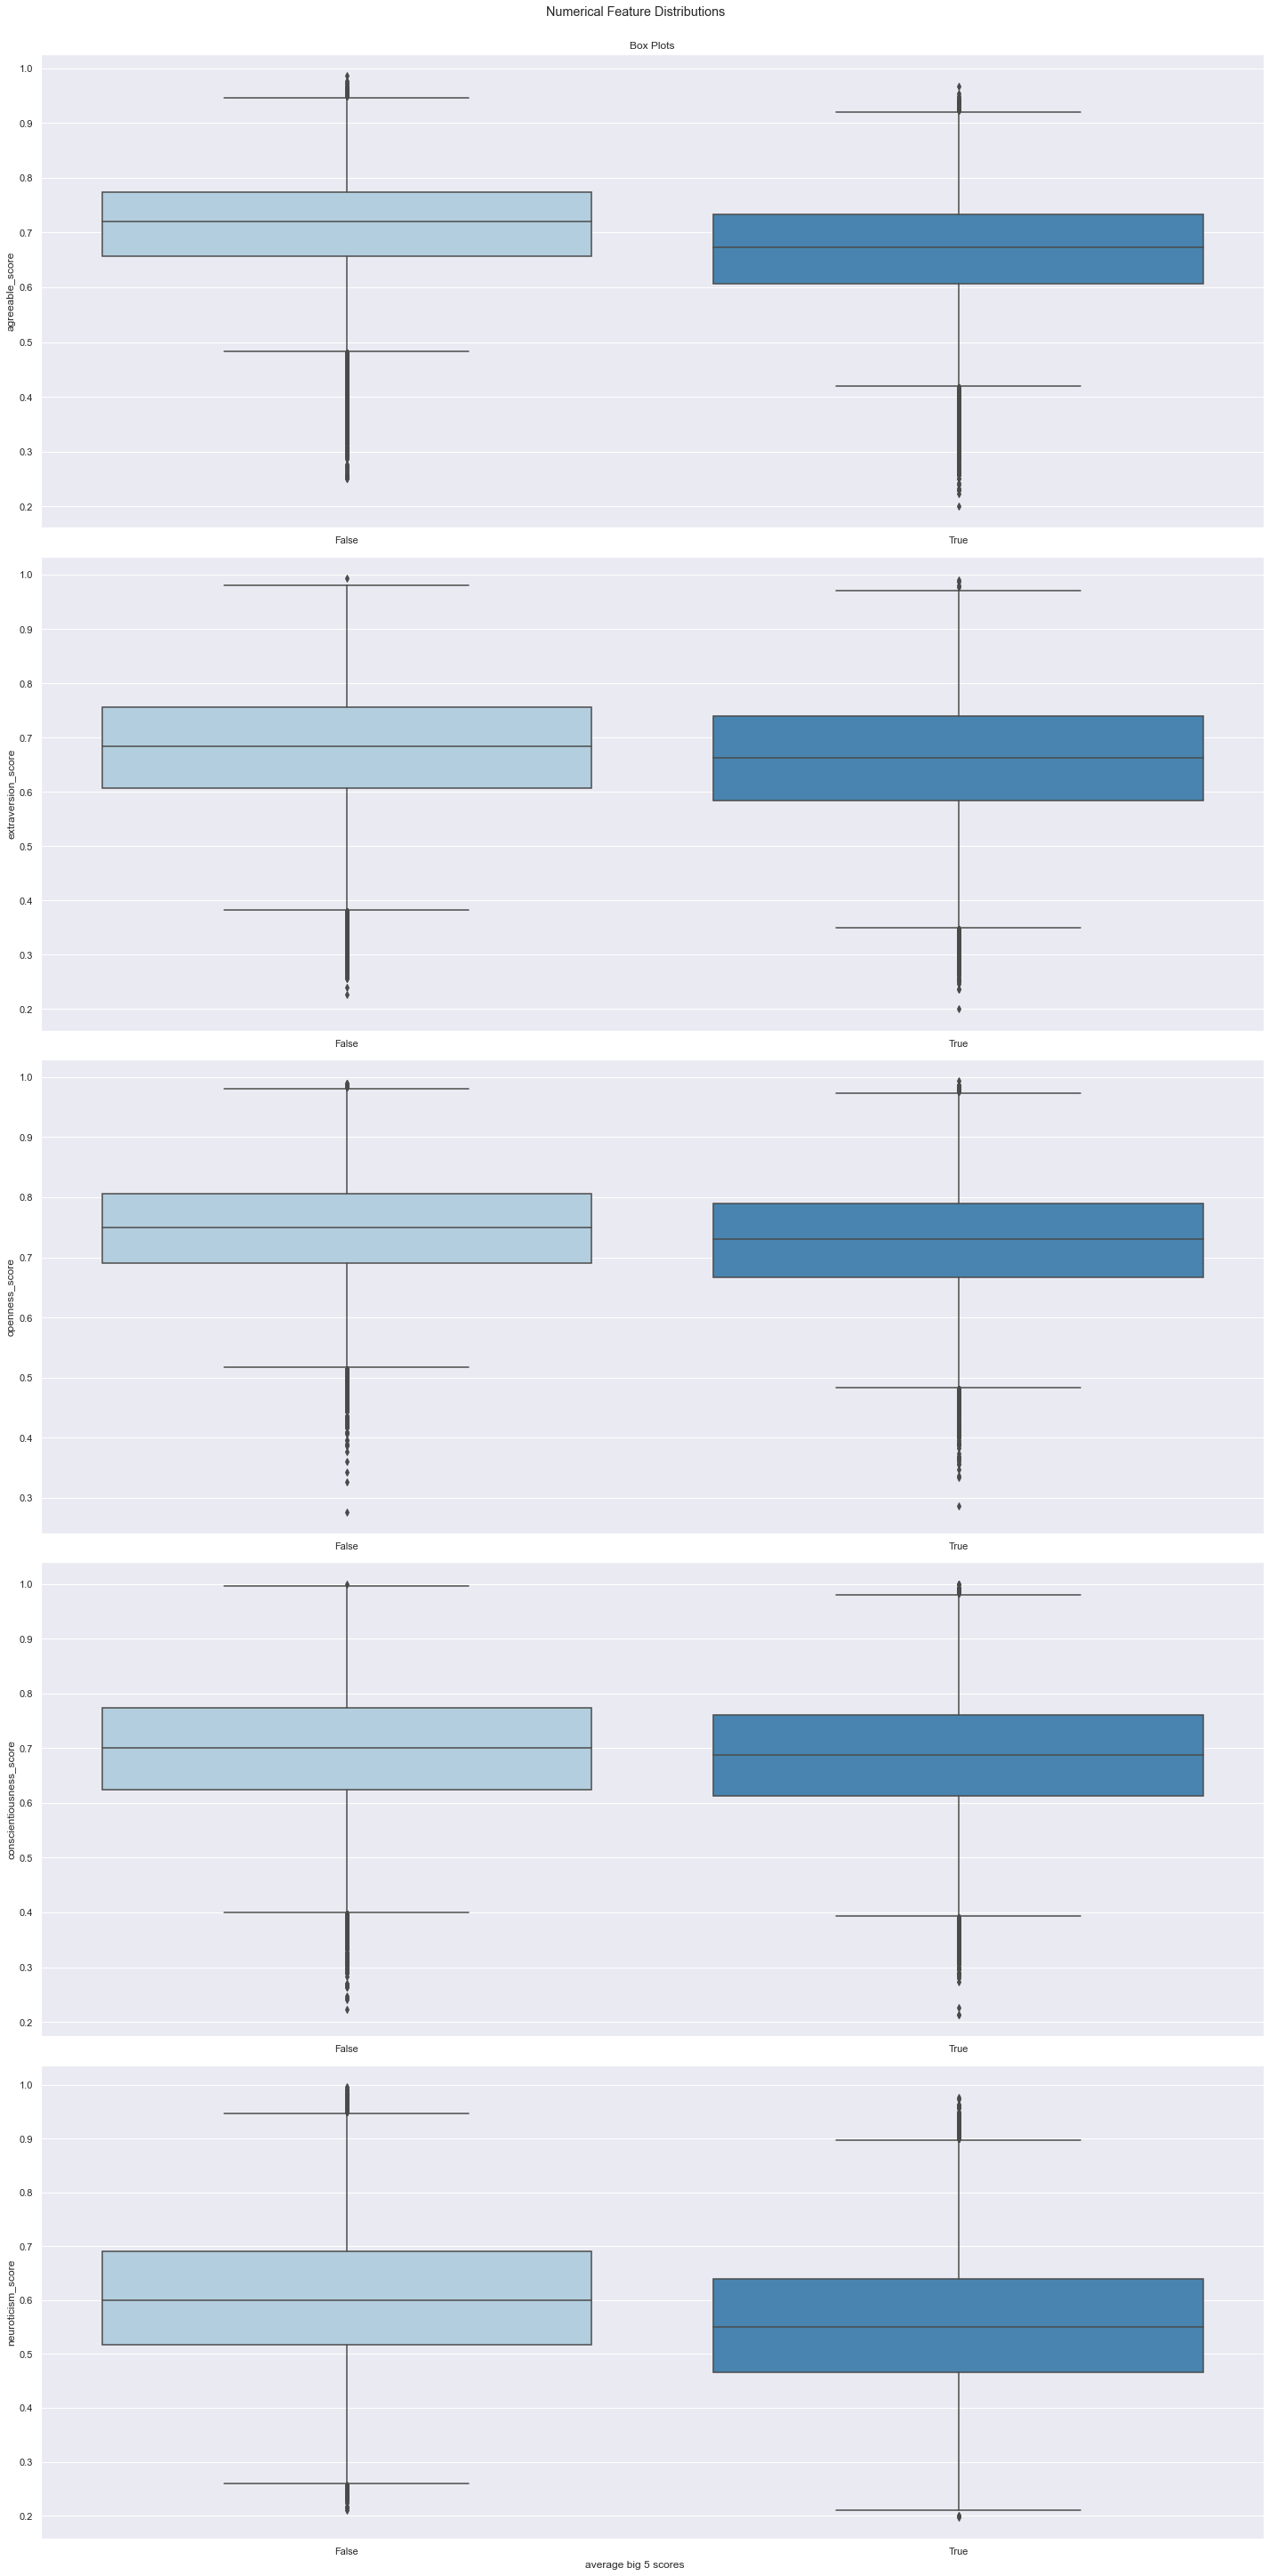

In [79]:

#create box plots with the averages of every big 5 criterion across the 2 sexes
numerical_features=X.loc[:,big_5]
nrows = len(numerical_features.columns)
fig, ax = plt.subplots(nrows=nrows,figsize=(20, 40))

for i, feature in enumerate(numerical_features):
    if i == 0:
        ax[i].set_title("Box Plots")        
    sns.boxplot(x='sex', y=feature, data=data, ax=ax[i],palette="Blues")
    
    ax[i].set_xlabel("")
box_plot= fig.text(0.5, 0, "average big 5 scores", ha='center')
box_plot = fig.suptitle("Numerical Feature Distributions", y=1)
fig.tight_layout()
box_plot


Overall, it seems that females (False=Female, True=Male), have an overall higher scores in all big 5 categroies.

To further explore the data, a new data with differences between sexes was created: each row in the DataFrame is 1 country and the value in each big 5 question is the absolute difference between males and females in the country. 

In [80]:

df_country_diff=data.groupby(['sex','country']).mean().reset_index()
for big in big_5:
    df_country_diff[f'diff_{big}'] = df_country_diff.groupby('country')[f'{big}'].diff().abs()
df_country_diff=df_country_diff.loc[:,['diff_agreeable_score','diff_extraversion_score','diff_openness_score','diff_conscientiousness_score','diff_neuroticism_score','gender_bias_score','gender_inequality_score']].dropna()


<AxesSubplot:>

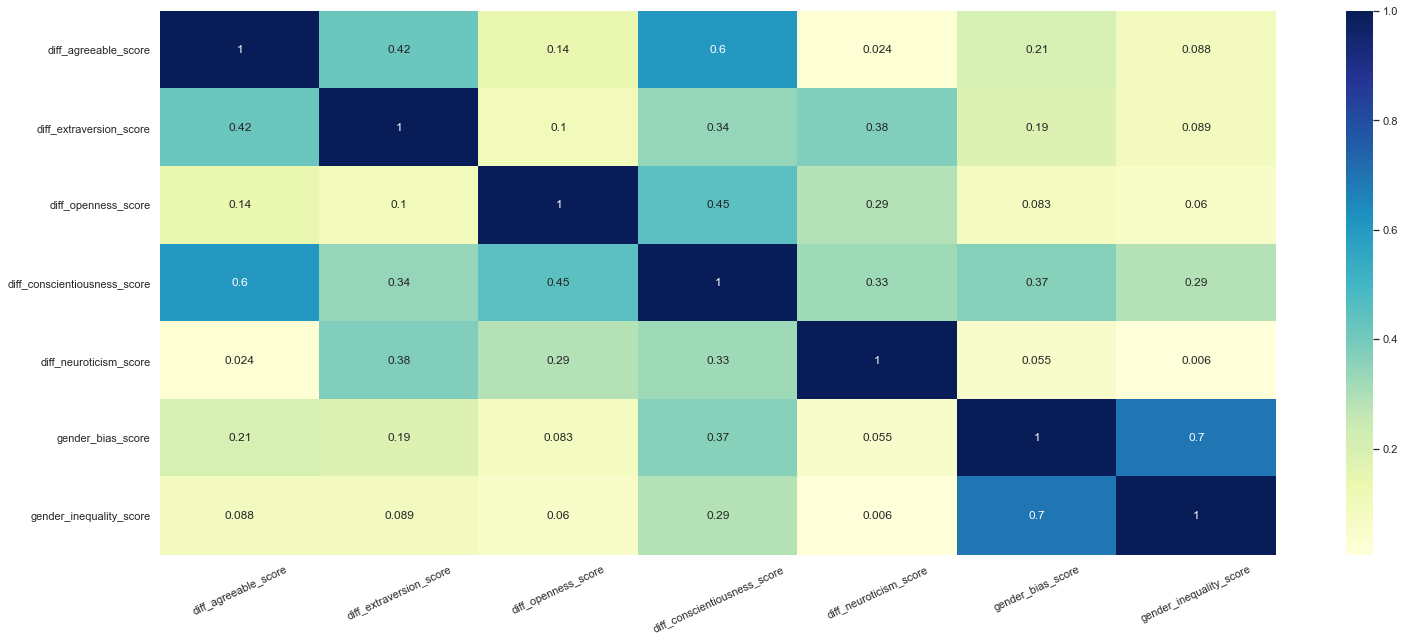

In [81]:
#correlation matrix with the new df
sns.set(font_scale=1)
correlation_matrix = df_country_diff.corr()

fig, ax = plt.subplots(figsize=(25, 10))
heat_map = sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu")
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=25)
heat_map


When looking at sex differences directly, gender inequality and gender bias seem to correlate with conscientiousness. Differences in how male and females consider themselves to display self-discipline, act dutifully, and strive for achievement against measures or outside expectations seem to be somewhat correlated with the amount of gender inequality in the country. 

In [82]:
from sklearn.model_selection import train_test_split

#split data for train- test. test size is 20% of total data. train size is 80% of total data.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=0.2)


<h3>Model and Results</h3>

I will use 2 models: the first one is a logistic regression with 5 k-fold cross validations. The second will be gradient boosting classifier with 5-k-fold cross validations as well. The inverse of regularization strength- C will be tuned for the logistic regression using gridsearchCV. 
N_estiamtors, Max depth and N_features will be tuned for gradient boosting using gridsearchCV.

l2 penalty for the logistic regression was used as it is better for collinear features (gender bias and gender inequality have high correlation). 

side note: I wanted to use 10 cross validations but my computer couldnt handle it.

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

alphas=np.logspace(start=-3, stop=0, num=50, endpoint=True)
C=1/alphas
parameters = { 'C': C }
clf_logit = GridSearchCV(LogisticRegression(random_state=0), parameters, cv=5, n_jobs=1)

clf_logit.fit(X_train, y_train.values.ravel())

#calculate AUC
y_proba = clf_logit.predict_proba(X_test)[:, 1]
fpr_logit, tpr_logit, thresholds = metrics.roc_curve(y_test, y_proba)
AUC_logit=metrics.auc(fpr_logit, tpr_logit)

model_logit=clf_logit.best_estimator_


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = { 'n_estimators': [10, 30, 50, 100],
               'max_features': [2,3,4,5],
               'max_depth' : [2,3,4,5],
              }


clf = GridSearchCV(GradientBoostingClassifier(random_state=0), parameters, cv=5, n_jobs=1)
clf.fit(X_train, y_train.values.ravel())

#model to use for shap
model_grad=clf.best_estimator_



In [56]:
#chosen parameters logistic regression
print(f'best params logisticRegression: {clf_logit.best_params_}')
#chosen parameters gradient boosting
print(f'best params gradienBoosting: {clf.best_params_}')

best params logisticRegression: {'C': 244.205309454865}
best params gradienBoosting: {'max_depth': 5, 'max_features': 3, 'n_estimators': 100}


In [57]:
#Feature importance of gradinet boosting
feature_importance=model_grad.feature_importances_
dict(zip(PRED_COLUMN_NAMES,feature_importance))

{'age': 0.038615054196698785,
 'agreeable_score': 0.3121197494243705,
 'extraversion_score': 0.1393187389723858,
 'openness_score': 0.056936978689602985,
 'conscientiousness_score': 0.06206438249279052,
 'neuroticism_score': 0.3468287932822081,
 'gender_bias_score': 0.01252588973326538,
 'gender_inequality_score': 0.03159041320867798}

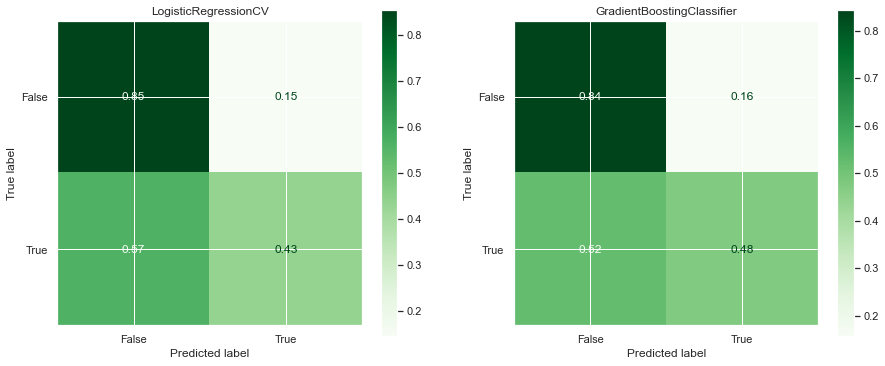

In [58]:
from sklearn.metrics import plot_confusion_matrix
fig,ax= plt.subplots(ncols=2,figsize=(15, 6))
log_confusion_mat = plot_confusion_matrix(model_grad,
                             X_test,
                             y_test,
                             cmap=plt.cm.Greens,
                             normalize="true",
                             ax=ax[1])

                           
_ = log_confusion_mat.ax_.set_title(f"GradientBoostingClassifier")

grad_conusion_mat = plot_confusion_matrix(model_logit,#needs to change to the model i use
                             X_test,
                             y_test,
                             cmap=plt.cm.Greens,
                             normalize="true",
                             ax=ax[0])

                           
_ = grad_conusion_mat.ax_.set_title(f"LogisticRegressionCV")



In [59]:
from sklearn.metrics import classification_report
#classification report logistic regression
predictions = clf_logit.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

#classification report gradient boosting
predictions = clf.predict(X_test)
report = classification_report(y_test, predictions)
print(report)



              precision    recall  f1-score   support

       False       0.72      0.85      0.78     20801
        True       0.64      0.43      0.52     12449

    accuracy                           0.70     33250
   macro avg       0.68      0.64      0.65     33250
weighted avg       0.69      0.70      0.68     33250

              precision    recall  f1-score   support

       False       0.73      0.84      0.78     20801
        True       0.64      0.48      0.55     12449

    accuracy                           0.71     33250
   macro avg       0.69      0.66      0.66     33250
weighted avg       0.70      0.71      0.69     33250



AUC logisticRegression: 0.727318894192483
AUC gradientoosting: 0.7406347700068131


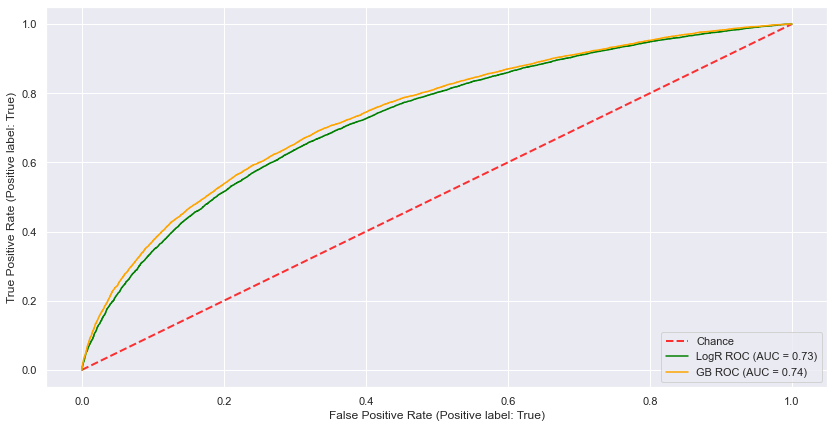

In [60]:
#auc logisticRegression
y_proba = clf_logit.predict_proba(X_test)[:, 1]
fpr_logit, tpr_logit, thresholds = metrics.roc_curve(y_test, y_proba)
AUC_logit=metrics.auc(fpr_logit, tpr_logit)
print(f'AUC logisticRegression: {AUC_logit}')

#AUC gradient boosting
y_proba=model_grad.predict_proba(X_test)[:, 1]
fpr_grad, tpr_grad, thresholds = metrics.roc_curve(y_test, y_proba)
AUC_grad=metrics.auc(fpr_grad, tpr_grad)
print(f'AUC gradientoosting: {AUC_grad}')

#create AUC graph
from sklearn.metrics import auc, plot_roc_curve

roc_auc_fig, roc_auc_ax = plt.subplots(figsize=(14, 7))

# Plot chance diagonal
roc_auc_ax.plot([0, 1], [0, 1],
                linestyle='--',
                linewidth=2,
                color='red',
                label='Chance',
                alpha=0.8)

#LogisticRegression AUC curve
_ = plot_roc_curve(model_logit,
               X_test,
               y_test,
               name="LogR ROC",
               color="green",
               ax=roc_auc_ax)

#GradientBoosting AUC curve
_ = plot_roc_curve(model_grad,
               X_test,
               y_test,
               name="GB ROC",
               color="orange",
               ax=roc_auc_ax)


Overall, by the classification report, confusion matrix and AUC scores, results seem to be comparable with slighlty better results when gradient boosting was used. Therefore, I will use the gradient boosting model when intereperting the model using SHAP.

<h3>Model Interpertability</h3>

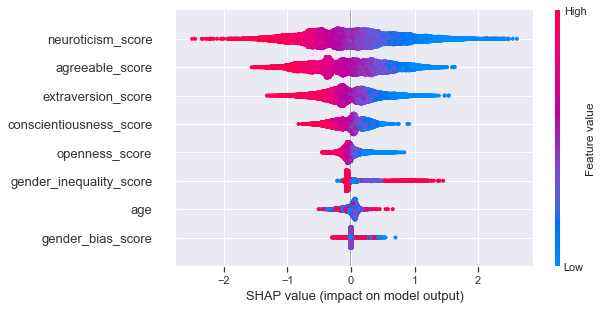

In [61]:
import shap

explainer = shap.TreeExplainer(model_grad)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values,X_test)

We shouldn't see a main effect for gender inequality score (according to the graph above the higher the gender inequality score, the greater the chances the person is a male). Therefore, I looked whether there is simply a higher percentage of male participants in countries with high inequality scores. Perhaps this trend was learnt during training.

In [62]:
#cases of females vs males in high inequality score
data_post_hoc=data.groupby(['sex','gender_inequality_score'])['case_id'].count().reset_index()
data_group=data_post_hoc.loc[data_post_hoc['gender_inequality_score']>=0.45]
print(data_group.groupby(['sex'])['case_id'].sum())

#cases of males vs females in high inequality score
data_post_hoc=data.groupby(['sex','gender_inequality_score'])['case_id'].count().reset_index()
data_group=data_post_hoc.loc[data_post_hoc['gender_inequality_score']<0.45]
print(data_group.groupby(['sex'])['case_id'].sum())


sex
False     717
True     1097
Name: case_id, dtype: int64
sex
False    102712
True      61721
Name: case_id, dtype: int64


The first rows are the male-female prevalence (in this data) in countries with higher scores than or equal to 0.45, while the latter depicts the prevalence in countries with gender inequality score below 0.45. Indeed, the ratio seem to exchange in countries with low ineqality. In other words, the possible main effect is due to the fact more males answered than females in high inequality countries. Therefore, the data perhaps holds a confound as less females answer in countries with high inequality.

Following this stage, I used dependence_plot to explore the interaction gender inequality and gender bias have with the 5 traits.

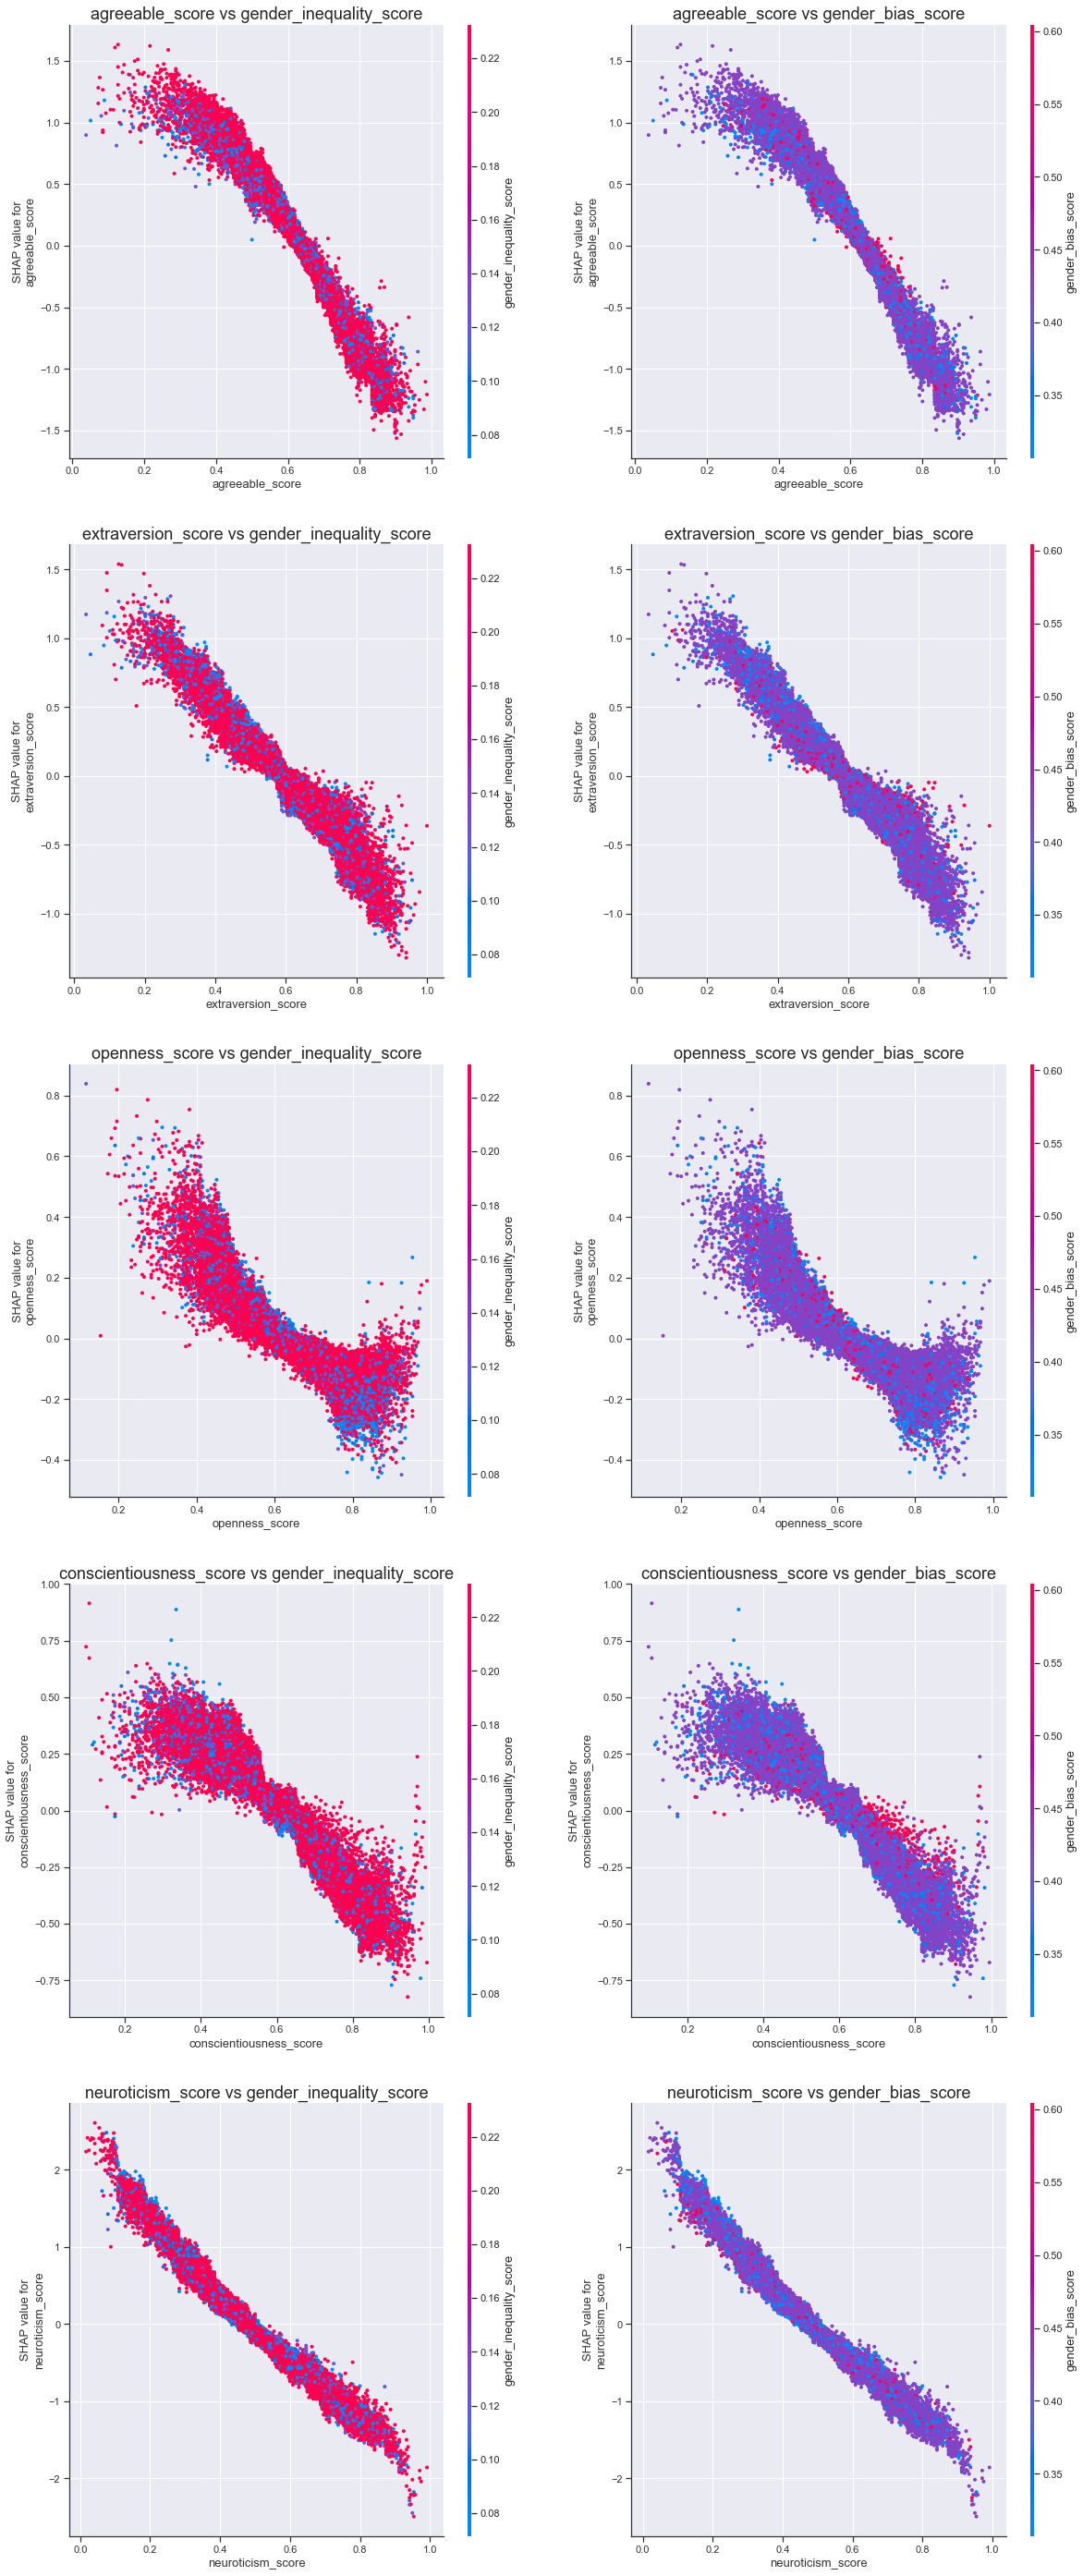

In [63]:
fig, ax = plt.subplots(nrows=5,ncols=2, figsize=(20, 50))
sns.set(font_scale=1.5)
for i, feature in enumerate(numerical_features): #SEE IF IT WORKS IN NOTEBOOK
    ax[i,0].set_title(f'{feature} vs gender_inequality_score')         
    shap.dependence_plot(f'{feature}', shap_values, X_test,interaction_index='gender_inequality_score',ax=ax[i,0], show=False)
    ax[i,1].set_title(f'{feature} vs gender_bias_score')         
    shap.dependence_plot(f'{feature}', shap_values, X_test,interaction_index='gender_bias_score',ax=ax[i,1], show=False)

    

While not fully conclusive there are hints of specific trends. When looking at the gender inequality score, there seems to be a negative correlation with openess and a positive correlation with conscientiouness. In other words, the higher a person reflects himself to be open while living in a society with low inequality, the more likely he is to be a female (compared to countries with high inequality); The less a person reflects himself to be conscientious while living in a society with low inequality, the more likely he is to be a male (compared to countries with high inequality). Note that these trends seem to be weak. 

<function matplotlib.pyplot.show(close=None, block=None)>

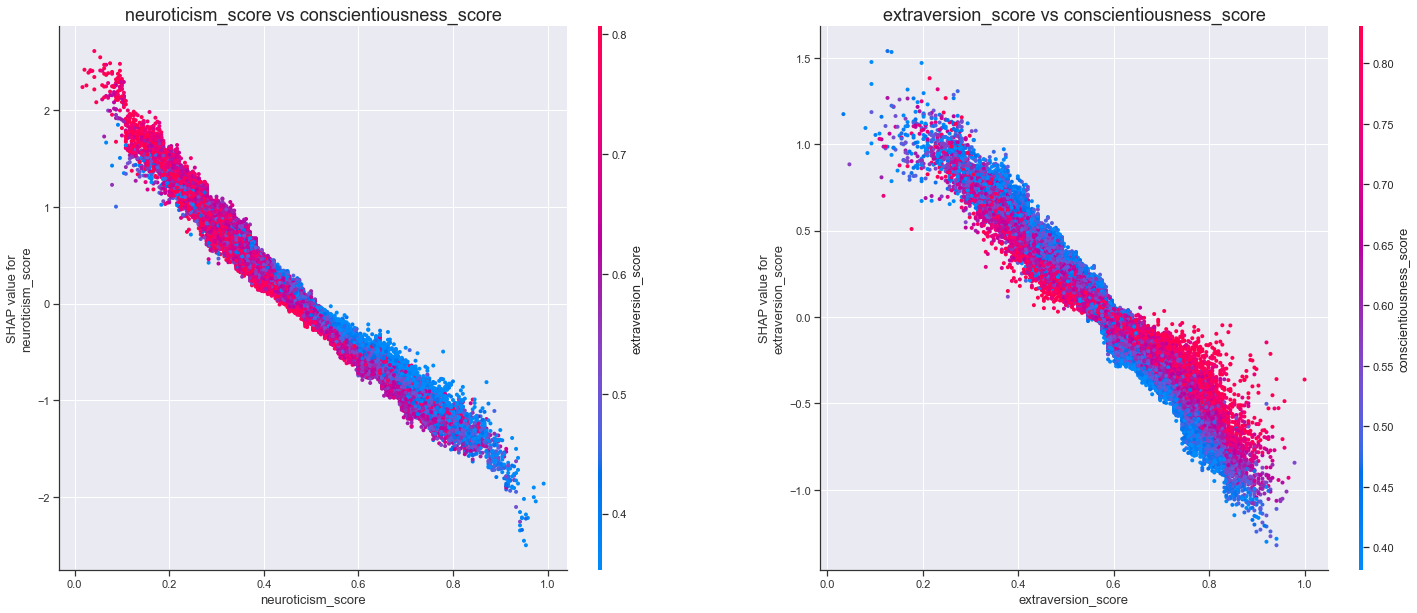

In [64]:
fig, ax = plt.subplots(ncols=2,figsize=(25, 10))
sns.set(font_scale=1.5)

ax[0].set_title('neuroticism_score vs conscientiousness_score') 
shap.dependence_plot('neuroticism_score', shap_values, X_test, interaction_index='extraversion_score', ax=ax[0],show=False)

ax[1].set_title('extraversion_score vs conscientiousness_score') 
shap.dependence_plot('extraversion_score', shap_values, X_test, interaction_index='conscientiousness_score',ax=ax[1],show=False)

plt.show


<h3>conclusions</h3>

Overall, both models were succesful in predicting the sex according to the big 5 questionnaire with an accuracy of 0.70 for the logistic regression and 0.71 for the gradient boosting classifier regression. The model using gradient boosting classifier showed slightly better results, having an AUC score of 0.74 compared with 0.727 for the logistic regression model. Both models were better at predicting females correctly than males. Specifically, looking at the confusion matrix, male predictions were significantly less accurate. 

Neuroticsm score and Agreeable score were the leading most influential features in the model by a wide margin. This suggests that Neuroticsm and Agreeableness are two features that differ the most between the two sexes (across all cultures). While some traits simply positivly correlated or negatively correlated with other traits (e.g., neuroticism with conscientiousness), others displayed a more interesting pattern. For example, while women generally consider themselves more introvert, females who consider themselves more extrovert will also consider themselves more conscientious. This pattern seems to be reversed for women who consider themselves more introvert. 

My second focus in this project was to look how gender inequality and gender bias affect sex prediction according to the big 5 questionnaire. Overall, the effect on the model was minimal. gender bias was the least important feature in the model and gender inequality was 3rd to last, only having a higher influence than age. When looking for the interaction with the big 5 traits, a small negative correlation with openess and a small positive correlation with conscientiouness seem to appear for gender inequality. Indeed, EDA revealed a small positive correlation of conscientiouness with gender inequality when sex differences were analyzed. Overall, results in this analysis are not conclusive (even for an exploratory analysis) to determine wheter the male-female profile is different across cultures with respect to gender inequality. 

references:

1.Costa Jr, P. T., Terracciano, A., & McCrae, R. R. (2001). Gender differences in personality traits across cultures: robust and surprising findings. Journal of personality and social psychology, 81(2), 322.

2.Bleidorn, W., Arslan, R. C., Denissen, J. J., Rentfrow, P. J., Gebauer, J. E., Potter, J., & Gosling, S. D. (2016). Age and gender differences in self-esteem—A cross-cultural window. Journal of personality and social psychology, 111(3), 396.

3. Garawi, F., Devries, K., Thorogood, N., & Uauy, R. (2014). Global differences between women and men in the prevalence of obesity: is there an association with gender inequality?. European journal of clinical nutrition, 68(10), 1101-1106.

4.de Looze, M., Elgar, F. J., Currie, C., Kolip, P., & Stevens, G. W. (2019). Gender inequality and sex differences in physical fighting, physical activity, and injury among adolescents across 36 countries. Journal of Adolescent Health, 64(5), 657-663.